# Trabalho 2
Descrição do trabalho:

https://web.tecgraf.puc-rio.br/~mgattass/visao/trb/T2.html

Aluno: Daniel da Silva Costa

E-mail: danieldasilvacosta@gmail.com

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
x_ = np.array( [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] )
y_ = np.array( [0.4, 0.7, 1.9, 2.0, 3.2, 4.5] )

In [3]:
# fig = plt.figure( figsize=( 4, 4 ) )
# plt.scatter( x_, y_ )
# plt.show()

In [4]:
def calcula_erro( a, b ):

    soma = 0.0
    n = x_.shape[0]
    for i in range(n):

        e  = y_[i] - ( a * x_[i] + b )
        soma += e * e

    return soma/n

In [5]:
a = np.arange( -2, 3, 0.1 )
b = np.arange( -2, 3, 0.1 )
aa, bb = np.meshgrid( a, b, sparse = True)

In [6]:
err = calcula_erro( aa, bb )

In [7]:
z = np.power( err, 0.2 )
n_levels = 15

In [8]:
# h = plt.contourf( a, b, z, n_levels )
# plt.axis( 'scaled' )
# plt.colorbar()
# plt.show()

### Gradiente Descendente

In [9]:
def calcula_da( a, b ):

    soma = 0.0
    for i in range( x_.shape[0] ):

        soma += x_[i] * ( y_[i] - ( a * x_[i] + b ) )

    return -2 * soma

In [10]:
def calcula_db( a, b ):

    soma = 0.0
    for i in range( x_.shape[0] ):

        soma += y_[i] - ( a * x_[i] + b )

    return -2 * soma

In [11]:
def grad_desc( a0, b0, tol, max_it, learning_rate ):

    erro0 = calcula_erro( a0, b0 )
    erros = [erro0]
    caminho = [[ a0, b0 ]]

    for it in range( max_it ):

        da = calcula_da( a0, b0 )
        db = calcula_db( a0, b0 )
        a1 = a0 - learning_rate * da
        b1 = b0 - learning_rate * db

        erro1 = calcula_erro( a1, b1 )
        erros.append( erro1 )
        caminho.append( [a1, b1] )

        if abs(erro1 - erro0) < tol and abs(a1 - a0) < tol and abs(b1 - b0) < tol:

            print( f'Convergiu na iteração {it}' )
            print( f'Erro atual = {erro1:.3f}' )
            print( f'Delta erro = {erro1 - erro0}' )
            break
        
        a0 = a1
        b0 = b1
        erro0 = erro1


    print( f'Solução a = {a1:.3f}' )
    print( f'Solução b = {b1:.3f}' )

    return a0, b0, np.array(caminho), np.array(erros)

Convergiu na iteração 1726
Erro atual = 0.098
Delta erro = -1.792981069170807e-08
Solução a = 0.802
Solução b = 0.112


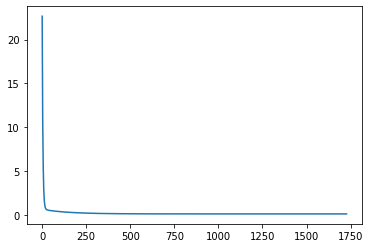

In [12]:
a0_gd, b0_gd, caminho, erros = grad_desc( -1, +1, 1e-5, 10000, 0.001 )

interacao = np.linspace( 0, erros.shape[0] - 1, erros.shape[0] )
plt.plot( interacao, erros )
plt.show()

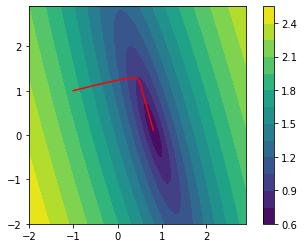

In [13]:
h = plt.contourf( a, b, z, n_levels )

plt.axis( 'scaled' )
plt.plot( caminho[:, 0], caminho[:, 1], 'r' )
plt.colorbar()
plt.show()

### Solução por Mínimos Quadrados

In [14]:
sxy = sx = sy = sx2 = 0
n = x_.shape[0]

for i in range(n):

    sxy += x_[i] * y_[i]
    sx += x_[i]
    sy += y_[i]
    sx2 += x_[i]**2

a_ls = ( n * sxy - sx * sy ) / ( n * sx2 - sx * sx )
b_ls = ( sy * sx2 - sx * sxy ) / ( n * sx2 - sx * sx )

In [15]:
print( f'=== a ===' )
print( f'ls = {a_ls:.3f}' )
print( f'gd = {a0_gd:.3f}' )
print()

print( f'=== b ===' )
print( f'ls = {b_ls:.3f}' )
print( f'gd = {b0_gd:.3f}' )

=== a ===
ls = 0.803
gd = 0.802

=== b ===
ls = 0.110
gd = 0.112


### Pytorch (autograd)

In [16]:
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

In [17]:
n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')
# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

#samples: 4, #features: 1


In [18]:
input_size = n_features
output_size = n_features

In [19]:
# model = nn.Linear(input_size, output_size)

In [20]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)

In [21]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = -4.125


In [22]:
learning_rate = 0.01
n_iters = 100

In [23]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  -0.5570077300071716  loss =  tensor(56.0069, grad_fn=<MseLossBackward0>)
epoch  11 : w =  1.16622793674469  loss =  tensor(1.8113, grad_fn=<MseLossBackward0>)
epoch  21 : w =  1.4558881521224976  loss =  tensor(0.3880, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.5145906209945679  loss =  tensor(0.3313, grad_fn=<MseLossBackward0>)
epoch  41 : w =  1.5357860326766968  loss =  tensor(0.3112, grad_fn=<MseLossBackward0>)
epoch  51 : w =  1.5506013631820679  loss =  tensor(0.2930, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.5640534162521362  loss =  tensor(0.2760, grad_fn=<MseLossBackward0>)
epoch  71 : w =  1.5769593715667725  loss =  tensor(0.2599, grad_fn=<MseLossBackward0>)
epoch  81 : w =  1.5894601345062256  loss =  tensor(0.2448, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.6015877723693848  loss =  tensor(0.2305, grad_fn=<MseLossBackward0>)
Prediction after training: f(5) = 9.201
